# Решающие деревья в sklearn

Пример работы с решающими деревьями из курса [Введение в Data Science и машинное обучение](https://stepik.org/course/4852) (раздел 2.1).

In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Наша задача – научиться предсказывать значения переменной `Y`, основываясь на значениях переменных `X_1` и `X_2`.

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

Проведем небольшую предобработку данных. Разобьем данные на используемые для обучения и то, что мы предсказываем.

In [6]:
X = data[['X_1', 'X_2']]
y = data.Y

Обучим дерево решений:

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Визуализируем дерево решений. 

In [8]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

Если при запуске ячейки, вы получите ошибку вида `ModuleNotFoundError`, установить отсутствующий модель можно прямо из блокнота, используя команду

```!pip install <имя_модуля>```

и далее вновь повторите импорт библиотек.

In [9]:
# ниже закоментированный пример для библиотеки graphviz
# для этой библиотеки может также потребоваться установка в системе
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# !pip install graphviz

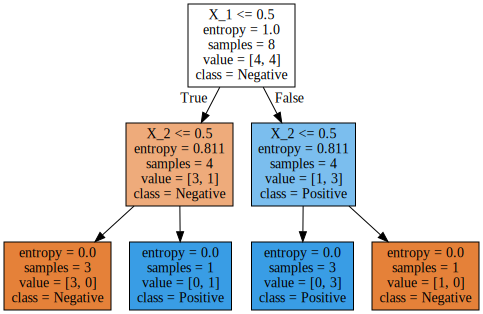

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))

Другой вариант построить то же дерево, используя возможности `sklearn`:

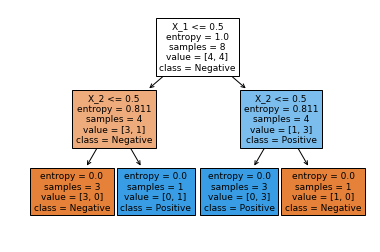

In [11]:
# точка с запятой, чтобы не выводить доп. информацию
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);